## **Fashion Mnist**
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):

Links: <br/>
[Keras](https://keras.io/api/datasets/fashion_mnist/) 
[Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
[TensorFlow](https://www.tensorflow.org/datasets/catalog/fashion_mnist)
[Paperswithcode](https://paperswithcode.com/dataset/fashion-mnist)

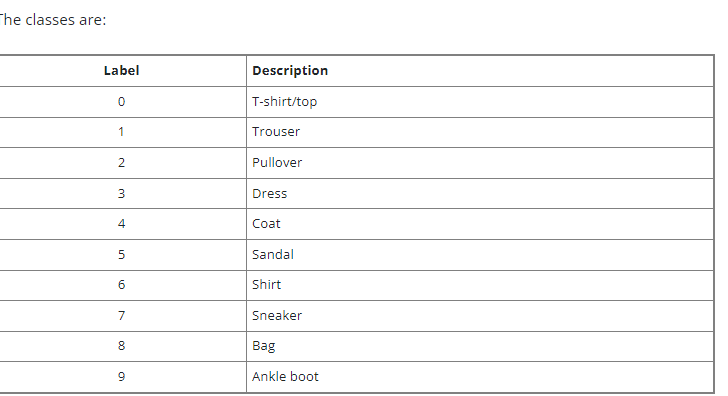

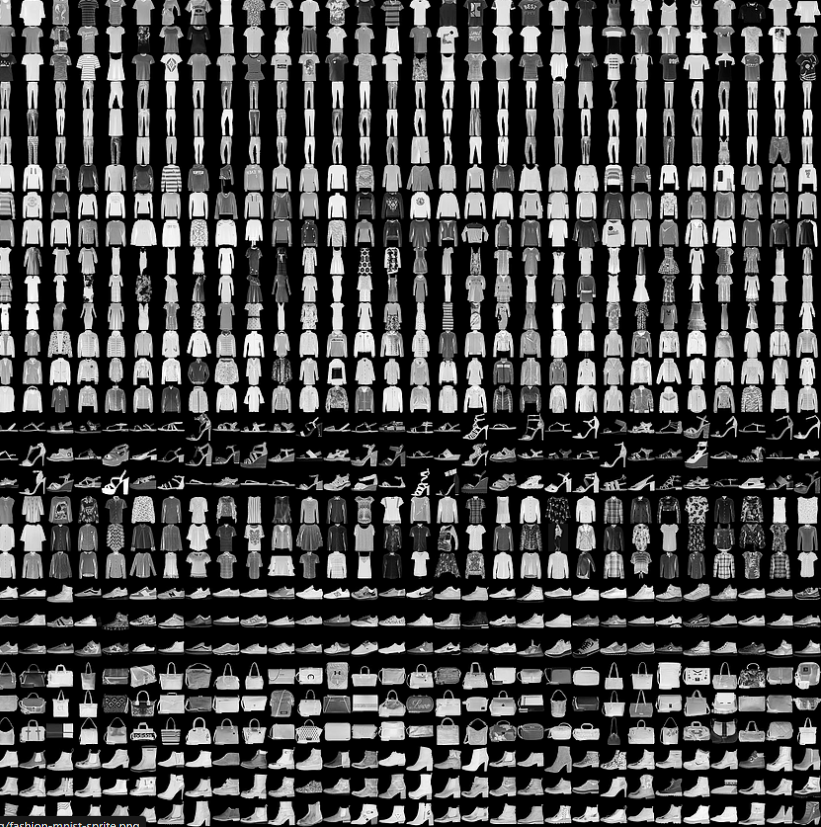

#### **Import necessary libraries**

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

<h3><b>Stage 1:  Exploration and data preprocessing</b></h3>

In [2]:
# import the mnist dataset from the inbuilt keras library
from tensorflow.keras.datasets import fashion_mnist

In [4]:
# unpack the already built-in train-test split data
(train_x,train_y), (test_x, test_y) = fashion_mnist.load_data()

In [5]:
# dimension of the variable  train_x
print("train_x shape: ",train_x.shape)
print("train_y shape: ",train_y.shape)
print("test_x shape: ",test_x.shape)
print("test_y shape: ",test_y.shape)

train_x shape:  (60000, 28, 28)
train_y shape:  (60000,)
test_x shape:  (10000, 28, 28)
test_y shape:  (10000,)


In [7]:
# let's grab the first item from the train_x to get a deeper insight
first_image = train_x[0]
first_image;

Let's take a look at the item in position "0" of train_x  by  using matplotlib to visualize

**Note:**  Eventhough matplotlib might show colored image to visualize the item the 
mnist dataset is grayscale and goes from 0 to 255.


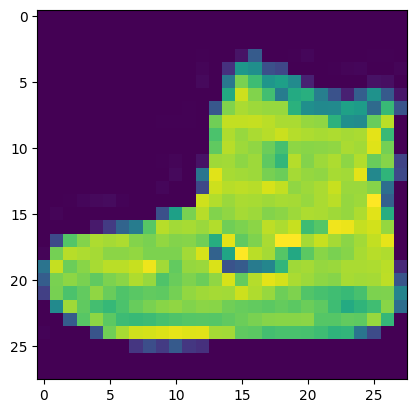

In [9]:
plt.imshow(first_image);

In [10]:
# let's grab the first item from the train_y to get a deeper insight
first_y_value = train_y[0]
first_y_value

9

If you notice train_y is an array of variable and we need to convert them into categorical variable so 
that the network does not assume it's a continuous variable we can do this by using keras inbuilt
to_categorical too.

In [11]:
train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
# encode train_y using onehot encoding technique
from tensorflow.keras.utils import to_categorical

In [13]:
# check unique classe in the array of train_y
(unique, counts) = np.unique(train_y, return_counts=True)
print("set of unique classes: ",unique)
print("Total count: ", len(unique))

set of unique classes:  [0 1 2 3 4 5 6 7 8 9]
Total count:  10


In [14]:
# encode train_y for the network to recognise it a categorical variable
encoded_train_y = to_categorical(train_y)

Now check the shape of the encoded_train_y and train_y to see the dimensions

In [15]:
# now check the shape of the train_y and encoded_train_y
print("shape of train_y: ", train_y.shape)
print("shape of encoded_train_y: ", encoded_train_y.shape)

shape of train_y:  (60000,)
shape of encoded_train_y:  (60000, 10)


In [16]:
# grab the first item to see how both train_y and encoded_train_y looks
print("train_y: ",train_y[0])
print("encoded_train_y: ", encoded_train_y[0])

train_y:  9
encoded_train_y:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<h4><b>Encode the variables</b></h4>

Since encoding the variables makes the work easier for the network we therefore
encode both the test and train data of y.

In [17]:
test_cat_y = to_categorical(test_y, num_classes=10)
train_cat_y = to_categorical(train_y, num_classes=10)

<h4><b>Normalize your data</b></h4>

In [18]:
# check what are the min and max value in the first value we grab from the train_x which was assigned to the variable first_image
print("Max value: ", first_image.max())
print("Min value: ", first_image.min())

Max value:  255
Min value:  0


In [19]:
# now normalize the train_x and test_y after understanding the min and max value
train_x_normalize = train_x/255
test_x_normalize = test_x/255

In [21]:
# grab one item from the scaled train_x_normalize data
train_x_normalize[0];

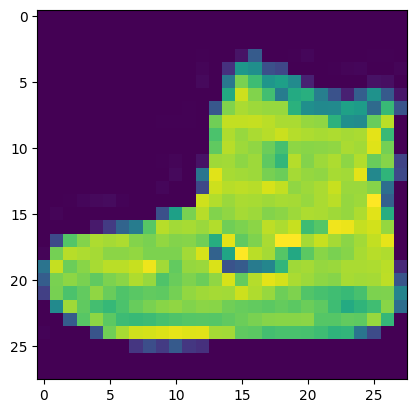

In [22]:
# note the image does not change since the scale is just the same
plt.imshow(train_x_normalize[0]);

<h4><b>Reshape our data so our network knows we are working with single RGB channel which is BW</b></h4>

In [23]:
train_x = train_x_normalize
test_x = test_x_normalize
print("train_x before reshape:", train_x.shape)
print("test_x before reshape:",test_x.shape)

train_x before reshape: (60000, 28, 28)
test_x before reshape: (10000, 28, 28)


In [24]:
# reshape batch_size, width, height, color_channels
train_X = train_x.reshape(60000, 28, 28,1)
test_X = test_x.reshape(10000, 28, 28,1)
print("train_X after reshape:", train_X.shape)
print("test_X after reshape:",test_X.shape)

train_X after reshape: (60000, 28, 28, 1)
test_X after reshape: (10000, 28, 28, 1)


<h3><b>Stage 2:    Model creation and training </b></h3>

In [25]:
# import model builder to build layers
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

<h5><b>Model Creation</b></h5>

In [27]:
from warnings import filters
Model = Sequential()
#convolutional layer 1
Model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 input_shape=(28,28,1),
                 activation='relu')) 
"""Relu: rectified Linear-unit"""
#pooling layer 1
Model.add(MaxPool2D(pool_size=(2,2)))

#convolutional layer 2
Model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu')) 
"""Relu: rectified Linear-unit"""
#pooling layer 2
Model.add(MaxPool2D(pool_size=(2,2)))

# flatten image to a single array 28*28
Model.add(Flatten())

# dense layer 1
Model.add(Dense(128,activation="relu"))
# dense layer 2
Model.add(Dense(64,activation="relu"))

# OUTPUT LAYER
"""One neuron per class for our classification
   and a softmax activation function which is suitable
   for MULTI CLASS
   for output.
"""
Model.add(Dense(10,activation='softmax'))

"""
   Categorical cross-entropy: is used when true labels are 
                            one-hot encoded.
   Cross entropy loss: is a metric used to measure how well 
   a classification model in machine learning performs
   keras.io/metric
"""
Model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy']) # optimizer ="adam/SGD"


In [28]:
# Insight into our model
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

<h5><b>Model Training</b></h5>

In [29]:
# import earlystopping to monitore when model should stop in other to avoid underfitting or overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# early stopping to monitor the loss
early_stop = EarlyStopping(monitor='val_loss', patience=1) # wait one epoch

In [31]:
%%time
Model.fit(train_X, train_cat_y, epochs=15, validation_data=(test_X,test_cat_y),
          callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 26s 7ms/step - loss: 0.4901 - accuracy: 0.8206 - val_loss: 0.3788 - val_accuracy: 0.8577
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3180 - accuracy: 0.8832 - val_loss: 0.3184 - val_accuracy: 0.8777
Epoch 3/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2750 - accuracy: 0.8982 - val_loss: 0.2985 - val_accuracy: 0.8852
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2466 - accuracy: 0.9077 - val_loss: 0.2721 - val_accuracy: 0.9007
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2245 - accuracy: 0.9162 - val_loss: 0.2749 - val_accuracy: 0.9006
CPU times: user 1min 11s, sys: 5.94 s, total: 1min 17s
Wall time: 1min 27s


<h3><b>Stage 3:    Model Evaluation </b></h3>

In [32]:
# lets explore our metrics a bit
metrics = pd.DataFrame(Model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.490088,0.820600,0.378787,0.8577
1,0.318019,0.883250,0.318378,0.8777
2,0.274970,0.898217,0.298534,0.8852
3,0.246592,0.907717,0.272125,0.9007
4,0.224512,0.916250,0.274944,0.9006


<Axes: >

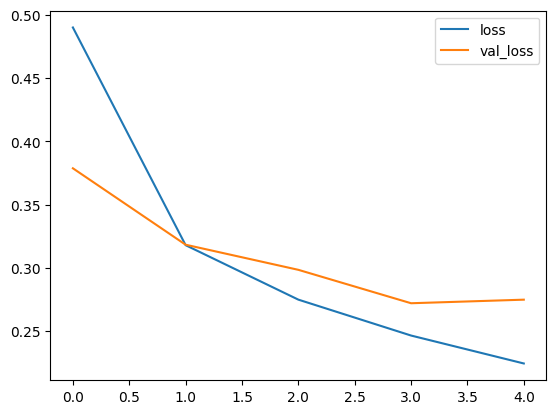

In [34]:
# let us see our loss and validation loss 
metrics[["loss","val_loss"]].plot()

<Axes: >

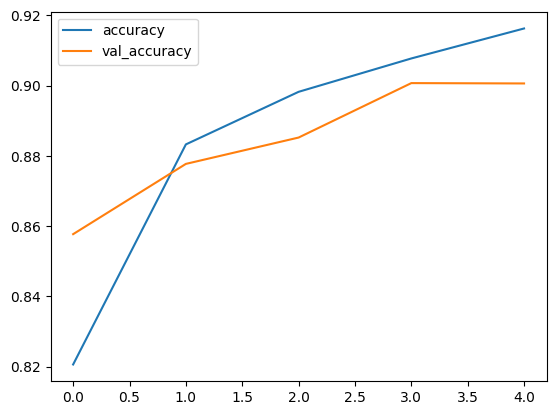

In [35]:
# let us see our accuracy and validation accuracy
metrics[["accuracy","val_accuracy"]].plot()

#### **To see all the metrics our model has**

In [36]:
# metric names
Model.metrics_names

['loss', 'accuracy']

In [37]:
# evaluate on the test set
Model.evaluate(test_X,test_cat_y,verbose=0)

[0.27494412660598755, 0.900600016117096]

In [38]:
# Model accuracy
modelEvaluate = Model.evaluate(test_X,test_cat_y,verbose=0)
print("Model accuracy:", round(modelEvaluate[1],4)*100,"%")
print("Model loss:", round(modelEvaluate[0],3)*100,"%")

Model accuracy: 90.06 %
Model loss: 27.500000000000004 %


#### **Classification** report and confusion matrix

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# run the prediction
prediction = Model.predict(test_X)
"""since predictions value is still in one-hot-encoded 
   we use the np.armax function to convert back to classes 
   [0,1,2,3,4,5,6,7,8,9]
"""
prediction = np.argmax(prediction,axis=1)

313/313 [==============================] - 1s 3ms/step


In [43]:
# prediction values
print("shape: ", prediction.shape)
print("Predictions: ", prediction)

shape:  (10000,)
Predictions:  [9 2 1 ... 8 1 5]


In [44]:
# true test value/ground truth 
test_y
print("test value: ",test_y.shape)
print("True values: ", test_y)

test value:  (10000,)
True values:  [9 2 1 ... 8 1 5]


In [46]:
# output the predictions value vs true test_y value
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.89      0.81      0.85      1000
           3       0.84      0.95      0.89      1000
           4       0.85      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.75      0.72      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [47]:
# confusion_matrix
confusion_matrix(test_y,prediction)

array([[806,   1,   7,  44,   1,   1, 136,   0,   3,   1],
       [  0, 972,   0,  25,   1,   0,   0,   0,   2,   0],
       [ 19,   1, 814,  16,  68,   0,  82,   0,   0,   0],
       [  5,   2,   4, 948,  19,   0,  21,   0,   1,   0],
       [  1,   0,  31,  49, 836,   0,  83,   0,   0,   0],
       [  1,   0,   0,   1,   0, 969,   0,  22,   0,   7],
       [ 90,   0,  52,  35,  63,   0, 750,   1,   9,   0],
       [  0,   0,   0,   0,   0,   5,   0, 982,   0,  13],
       [  4,   0,   2,   7,   1,   3,   0,   5, 976,   2],
       [  1,   0,   0,   0,   0,   4,   0,  42,   0, 953]])

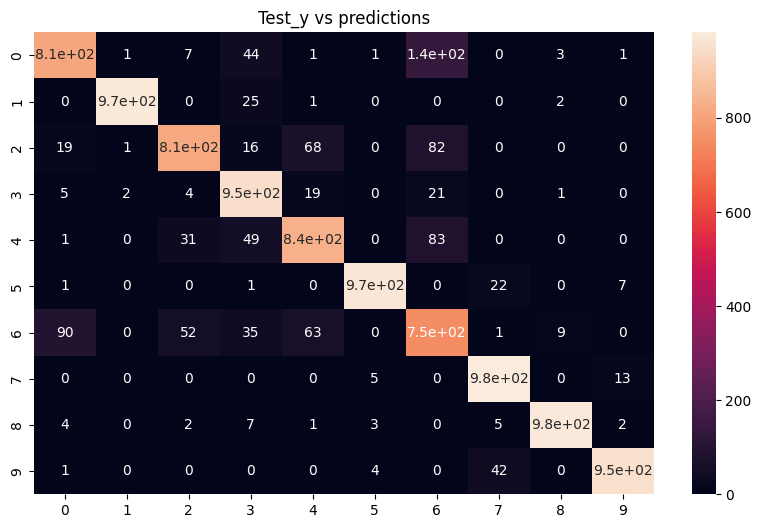

In [55]:
# visualize the confusion matrix
import seaborn as sns

plt.figure(figsize=(10,6))
line_plt = sns.heatmap(confusion_matrix(test_y,prediction),annot=True)


line_plt.set(title = "Test_y vs predictions");

<h3><b>Stage 4: How you predict a single image</b></h3>

In [78]:
# Use prediction function to return class and product name 
def predFunction(result):
  """ returns the class of the prediction"""
  if result == 0:
     return 'T-shirt/top'
  elif result == 1:
     return 'Trouser'
  elif result == 2:
     return 'Pullover'
  elif result == 3:
     return 'Dress'
  elif result == 4:
     return 'Coat'
  elif result == 5:
     return 'Sandal'
  elif result == 6:
     return 'Shirt'
  elif result == 7:
     return 'Sneaker'
  elif result == 8:
     return 'Bag'
  elif result == 9:
     return 'Ankle boot'
  else:
     return "Does not belong to the dataset"

# for the product article
article = predFunction(result)


def Article(article):
  if article[0] == 'A'.isalpha():
     return 'an'
  else:
    return 'a'

In [79]:
# select the first image in the test_x set
pick_first_image = test_x[10]

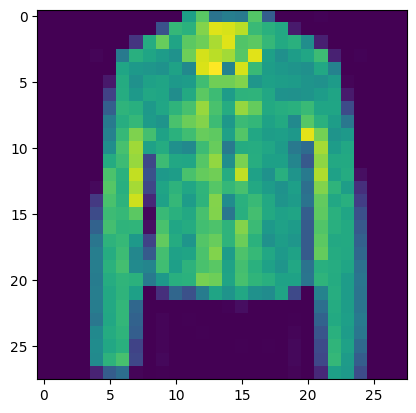

In [80]:
plt.imshow(pick_first_image);

In [81]:
# Ask the model to predict what image is "pick_first_image"
pred = Model.predict(pick_first_image.reshape(1,28,28,1))
result = int(np.argmax(pred,axis=1)[0])
print(f"The product on the image belongs to class {result} and it is {Article(article)}", predFunction(result),".")

1/1 [==============================] - 0s 26ms/step
The product on the image belongs to class 4 and it is a Coat .
